In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

dataset import and first plot. renamed second column

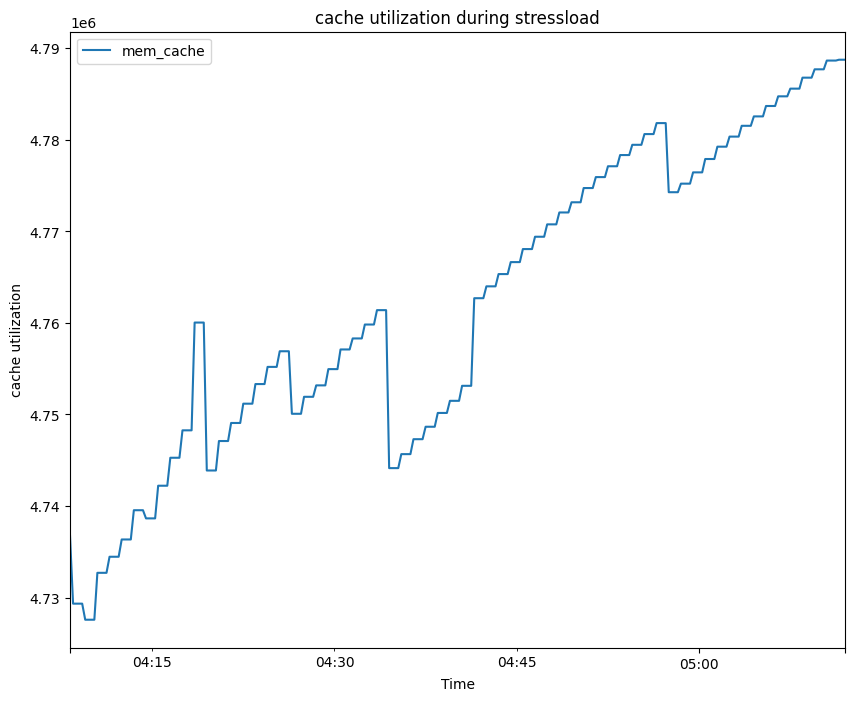

In [9]:
df = pd.read_csv('../datasets/mem_cache.csv', parse_dates=['Time'], index_col='Time')

df.columns = ['mem_cache']
ax = df.plot(figsize=(10,8))
ax.set_xlabel('Time')
ax.set_ylabel('cache utilization')
ax.set_title('cache utilization during stressload')
plt.show()


Show long-term trends in the time series by smoothing out short-term fluctuations

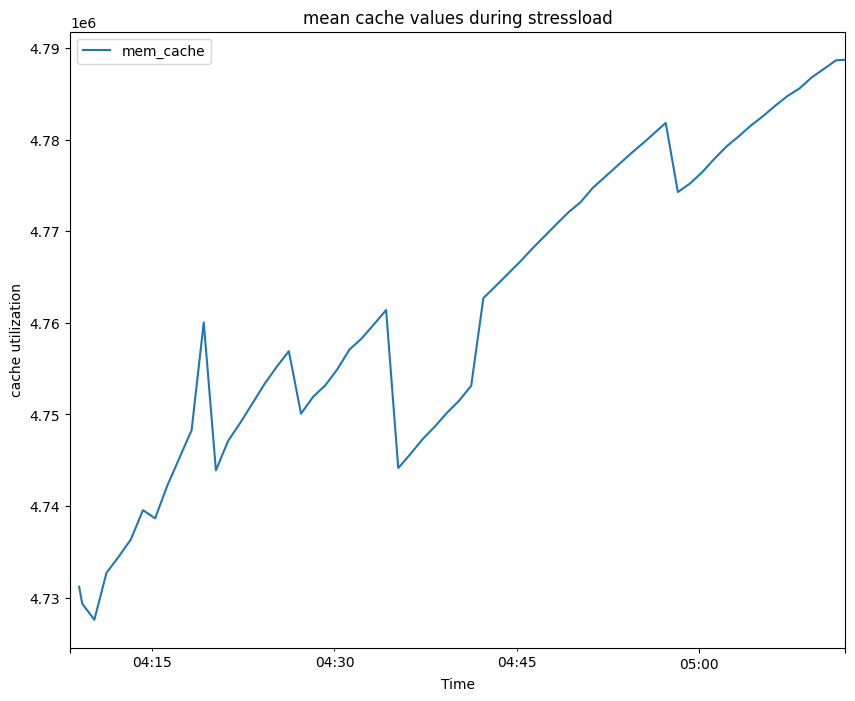

In [10]:
df_mean = df.rolling(window=4).mean()  #window every 1 minute, so 4 data points
ax = df_mean.plot(figsize=(10,8))
ax.set_xlabel('Time')
ax.set_ylabel('cache utilization')
ax.set_title('mean cache values during stressload')

plt.show()

boxplot of the data

Text(0.5, 1.0, 'boxplot of cache utilization')

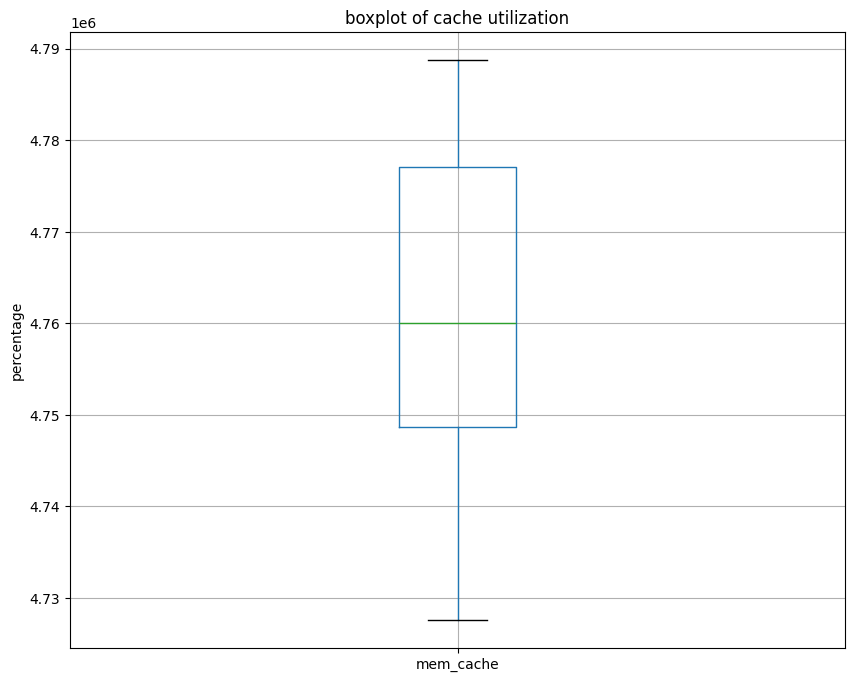

In [11]:
ax1 = df.boxplot(figsize=(10,8))
ax1.set_ylabel('percentage')
ax1.set_title('boxplot of cache utilization')


# plotting autocorrelation of the data ACF

how well the values of a time series are correlated with their past values. tells if there is a pattern in the data that repeats over time. This is useful for identifying seasonality, trends, and dependencies between past and future values in the time series.

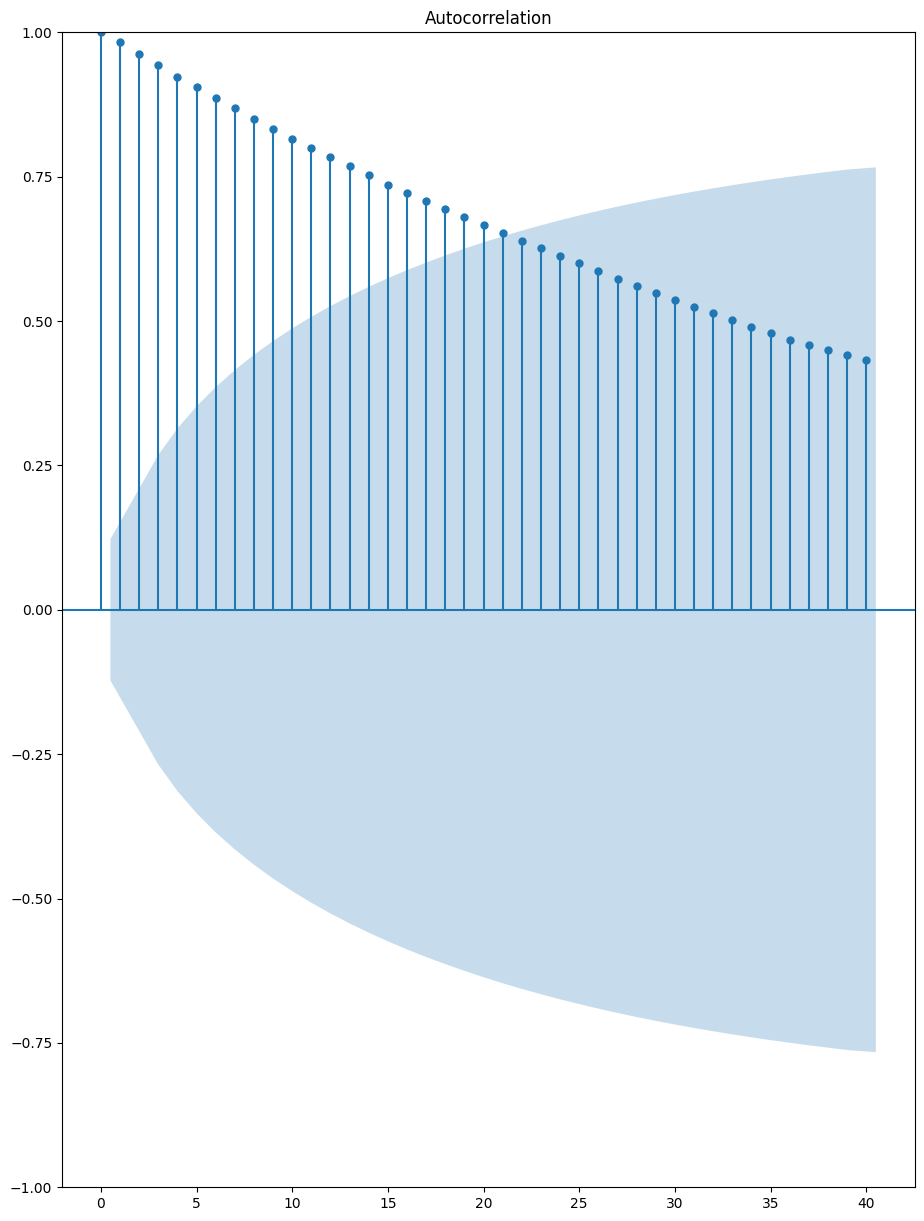

In [12]:
fig = tsaplots.plot_acf(df['mem_cache'], lags=40)
plt.show()

# plotting partial autocorrelation PACF

Measures the direct correlation at each lag, after removing the indirect effects of earlier lags.

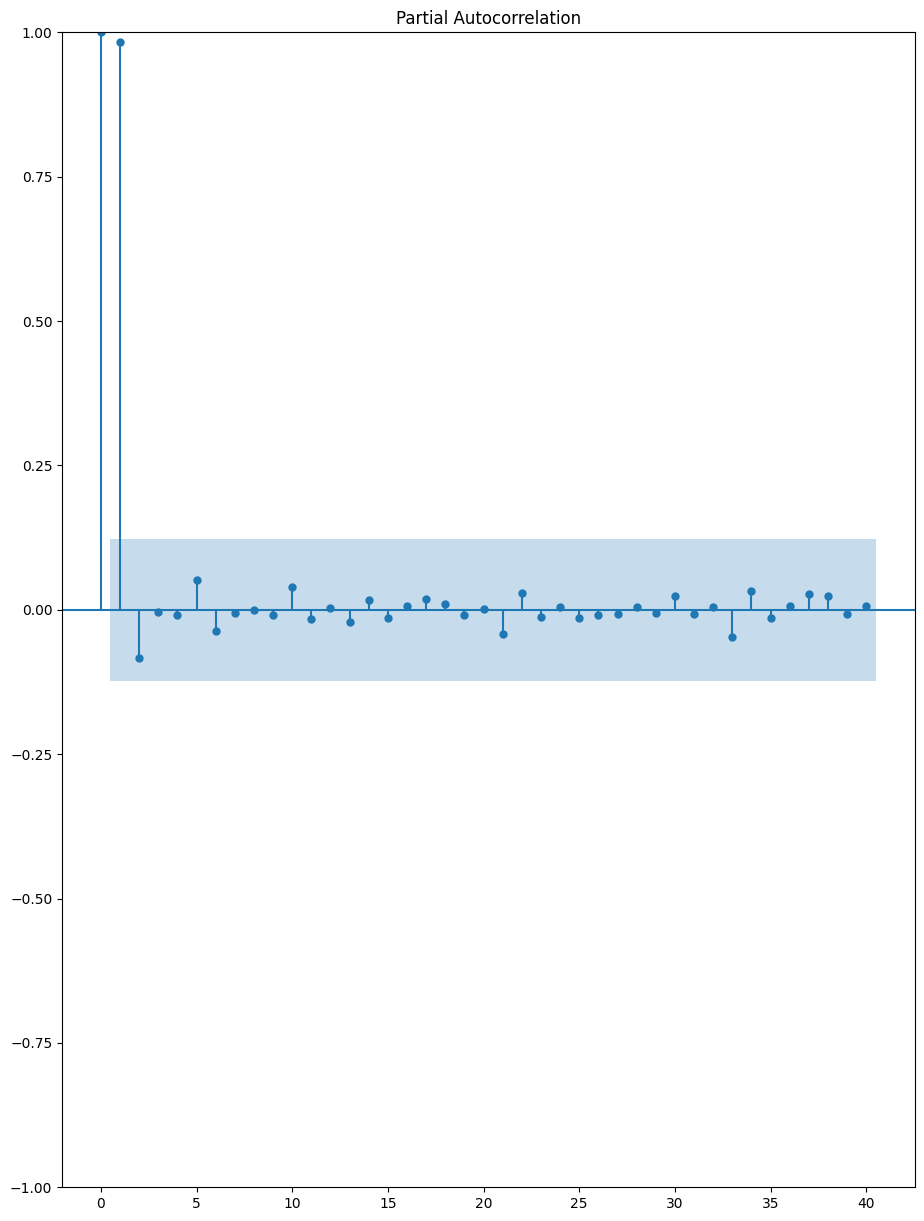

In [13]:
fig = tsaplots.plot_pacf(df['mem_cache'], lags=40)  #to see the lags
plt.show()

# time series decomposition

/tmp/ipykernel_148404/905457542.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.asfreq('15S')


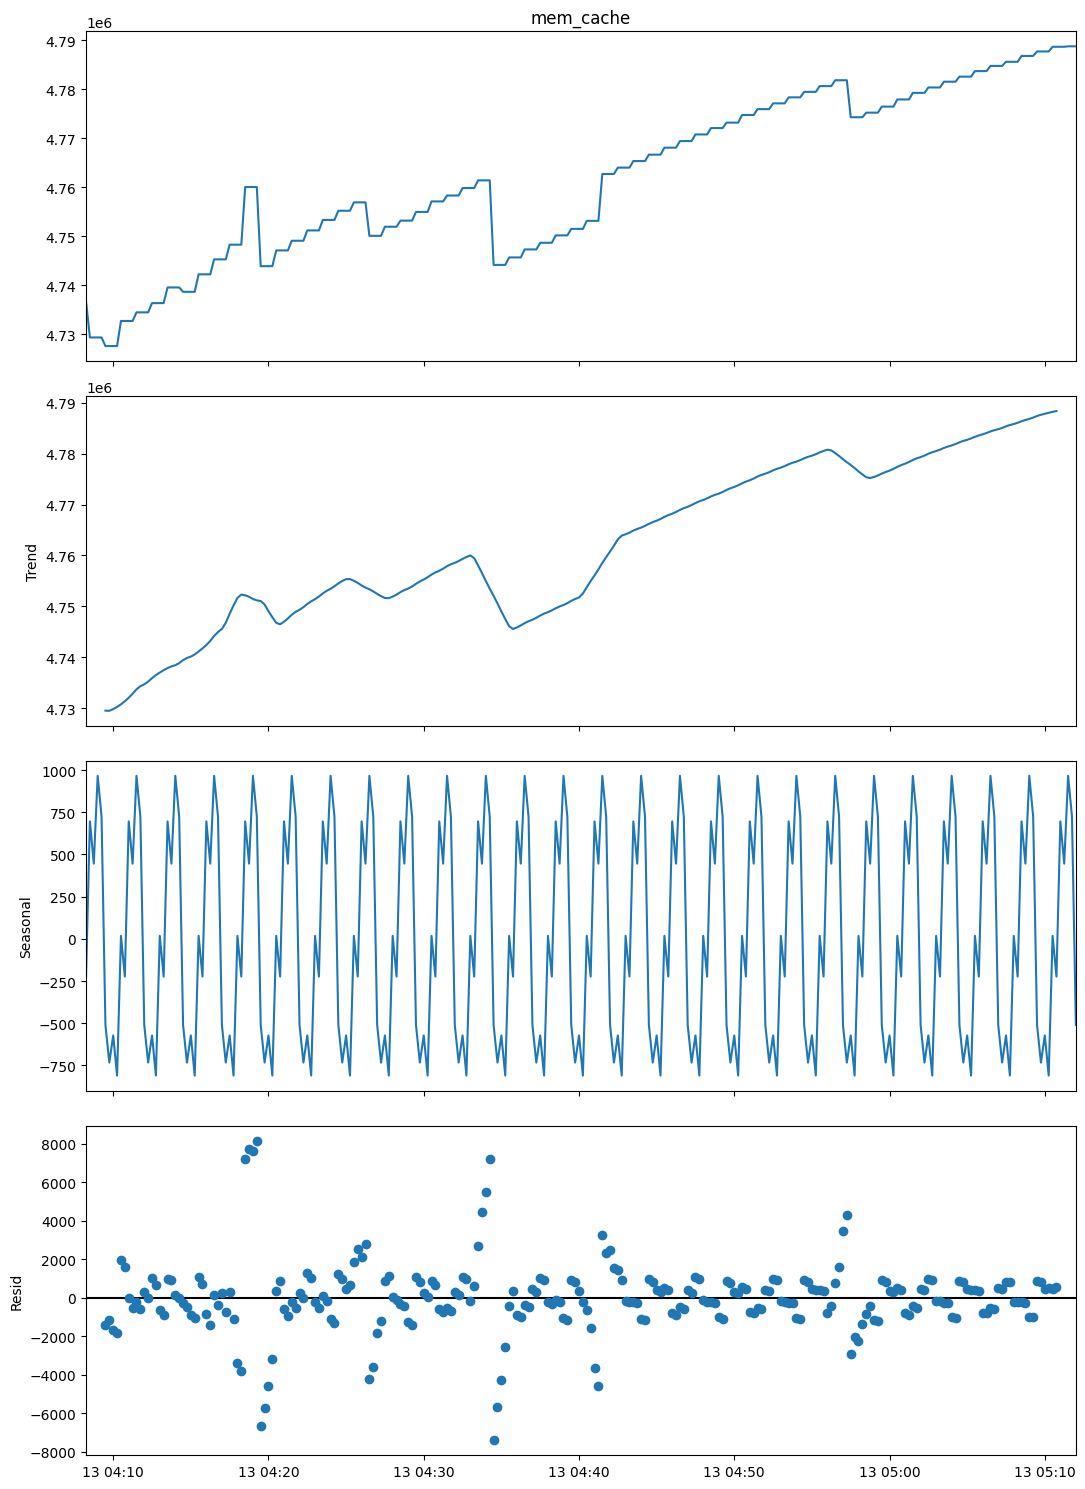

In [14]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('15S') 
rcParams['figure.figsize'] = 11, 15  
decomposition = sm.tsa.seasonal_decompose(df['mem_cache'], model='additive', period=10)  #check period and adjust
fig = decomposition.plot()
plt.show()